To run this notebook, refer to the README.md file in the root directory of this repository for installation instructions and other information.

# Problem statement
The function  employs a mathematical optimization model that integrates simulated transport data to define service regions for bike-sharing systems. The methodology follows these key steps:
1.	Input data pre-processing (for public transport network structure and user demand)
2.	Network building and assumptions, as explained in the model paper 
3.	Decision criteria model, includes different parameters like budget, investment costs, and operational efficiency, multimodal accessibility (to enhance the connectivity within the network), the framework penalizes suboptimal routes
4.	The output result is an optimized configuration of bike-sharing stations within the network. The bike inventory and capacity per station over different time periods is also provided

## 1. Input data and 2. Network building
The demonstrator creates the simulation data for the model. The network is built with the following configuration, for demonstration purposes : 
- Grid 4 width, 4 height
- max of 2 shortest paths
- 100 user demand 

The `shared_mobility_network_optimizer` package contains the model algorithm with simulation data.

```py
from shared_mobility_network_optimizer import SharedMobilityNetworkOptimizer

model = SharedMobilityNetworkOptimizer()
model.build_network()
```

The `build_network()` function in the `SharedMobilityNetworkOptimizer` class creates a network and demand. 
Then the shortest paths for every trip demand within the network is calculated.

The calculated shortest paths are saved in a local file the first time, for cache purposes. 


## 3. Define the decision criteria
TODO: Refactor to define tunable decision criteria for the optimization model. This data will be passed to the `BikeSharingModel` class. 
```py
#TODO: create a decision criteria for the optimization model, for example
```

## 4. Run the model 
To run the model, run function `optimize()` in the `SharedMobilityNetworkOptimizer` class will create an instance of the optimization model, with the network, the shortest path solver, and the demand generator as input.

The optimization model is implemented with Gurobi. 

```py
model.optimize()
```

## 5. Visualize the results
The results of the model are saved in a local file. The  `plot()` function in the `SharedMobilityNetworkOptimizer` class can be used to visualize the results. 

```py
model.plot()
```

---

# Configuration Guide for NetworkDesignBSSConfig

This document describes the configuration parameters available for customizing the bike-sharing network simulation and optimization model.

The model is fully configurable through the `NetworkDesignBSSConfig` class, which can be initialized from a JSON object, Python dictionary, or code.


## Configuration Model

The configuration object defines:
- Area size and structure
- Public transport settings
- User demand generation
- Speed profiles for travel modes
- Optimization penalties and coverage criteria
- Bike station capacity

Example usage:

```python
from shared_mobility_network_optimizer.models import NetworkDesignBSSConfig

config = NetworkDesignBSSConfig(
    AREA_LENGTH=4,
    AREA_WIDTH=4,
    NUM_SHORTEST_PATHS=2,
    TOTAL_TRIPS_NUMBER=50,
    FIXED_LINE_POINTS_LST = [[3, 4, 7, 8]]
)
```

You can pass this configuration to the optimizer when initializing or running a new simulation.


### Available Configuration Parameters

| PARAMETER | Type | Default | Description |
|-----------|------|---------|-------------|
| `DATA_PATH` | `str` | `"data"` | Path to directory containing input data |
| `CACHE_PATH` | `str` | `"cache"` | Path to cache directory for intermediate results |
| `NUM_SHORTEST_PATHS` | `int` | `3` | Number of shortest paths computed per OD pair |
| `MAX_RELATIVE_GAP` | `float` | `0.2` | Maximum allowed travel time gap between suboptimal and optimal paths |
| `OD_COVERAGE_RATIO` | `float` | `0.5` | Minimum ratio of OD pairs that must be serviced |
| `AREA_LENGTH` | `int` | `3` | Length of the simulation area grid (units) |
| `AREA_WIDTH` | `int` | `3` | Width of the simulation area grid (units) |
| `CELL_SIZE` | `int` | `1` | Size of each grid cell (units) |
| `WALK_CATCHMENT_RADIUS` | `float` | `1.0` | Walking catchment area radius (km) |
| `RIDE_CATCHMENT_RADIUS` | `float` | `4.0` | Biking catchment area radius (km) |
| `PT_TRANSFER_RADIUS` | `float` | `0.5` | Maximum distance for PT transfers (km) |
| `WALK_SPEED` | `float` | `5.0` | Average walking speed (km/h) |
| `RIDE_SPEED` | `float` | `15.0` | Average biking speed (km/h) |
| `PUBLIC_TRANSPORT_SPEED` | `float` | `30.0` | Average public transport speed (km/h) |
| `CAR_SPEED` | `float` | `45.0` | Average car speed (km/h) |
| `TOTAL_TRIPS_NUM` | `int` | `300` | Total number of trips to generate per period |
| `TIME_PERIODS` | `int` | `3` | Number of simulation time periods |
| `PENALTY_COEFFICIENT` | `float` | `0.1` | Penalty applied for choosing suboptimal paths |
| `CAPACITY_UB` | `int` | `30` | Maximum bike station capacity (bikes) |
| `FIXED_LINE_POINTS_LST` | `List[List[int]]` | `[[3, 4, 7, 8]]` | Predefined PT fixed-line stations |
| `REBALANCING_FLAG` | `bool` | `True` | Whether bike rebalancing is considered |


### Using Configuration in Simulations

You can instantiate and inject the configuration into the simulation pipeline:

```python
from shared_mobility_network_optimizer import SharedMobilityNetworkOptimizer
from shared_mobility_network_optimizer.models import NetworkDesignBSSConfig

config = NetworkDesignBSSConfig(
    AREA_LENGTH=4,
    AREA_WIDTH=4,
    NUM_SHORTEST_PATHS=2,
    TOTAL_TRIPS_NUMBER=50,
    FIXED_LINE_POINTS_LST = [[3, 4, 7, 8]]
)

model = SharedMobilityNetworkOptimizer(config=config)
model.run_pipeline()
```

This will:
- Build the network according to the configuration
- Run the optimization model
- Visualize results accordingly


### Notes
- All parameters have default values if not specified.
- Parameters are validated on initialization (e.g., types must match expected).
- Configuration can be loaded from a JSON file for reproducibility.


### Future Improvements IDEAS
- Adding validation rules (e.g., max/min values).
- Configuration profiles for fast preset switching (e.g., "urban", "suburban", "dense metro" scenarios).

---

# Future work 
- The model will be executed with Geneva Living Lab data, a new demo script will be created for this purpose.


📦 Preprocessing data
🌐 Constructing transport network
Grid center walks to userOD processed: 24 arcs added.

Grid center walks to bikeStation processed: 64 arcs added.

Grid center walks to publicTransportStop processed: 0 arcs added.

PT stop walks to bike stations processed: 9 arcs added.

Biking processed: 118 arcs added.

Node: 
  - userOD: 16
  - bikeStation: 16

 Arc:
  - Walk: 194
  - Bike: 236
  - PT_1: 6
🚦 Solving shortest paths
✅ Found file 'shortest_paths_cache_size4_k2_[[3, 4, 7, 8]]_.pkl', loading...
🧠 Running optimization model
Set parameter Username
Set parameter LicenseID to value 2661499
Academic license - for non-commercial use only - expires 2026-05-06
=== Sets Initialization Completed ===
Total OD pairs (K): 275
Total Bike Stations (B): 16
=== Parameters Initialization Completed ===
Start setting variables
=== Variables Initialization Completed ===
=== Objectives Initialization Completed ===
=== Constraints Initialization Completed ===
Final total constraints count:

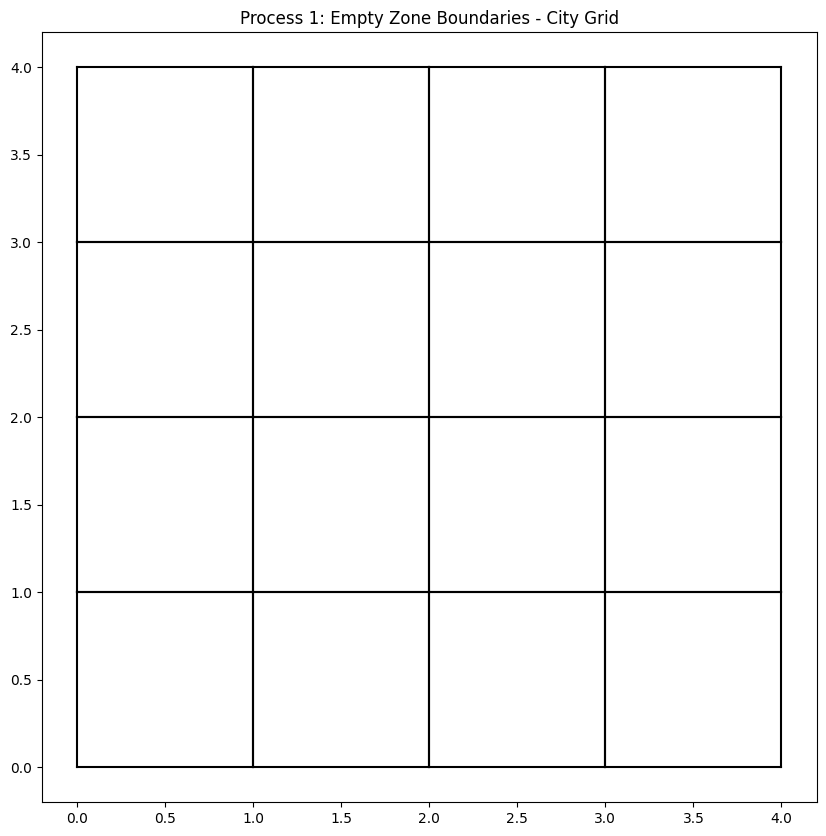

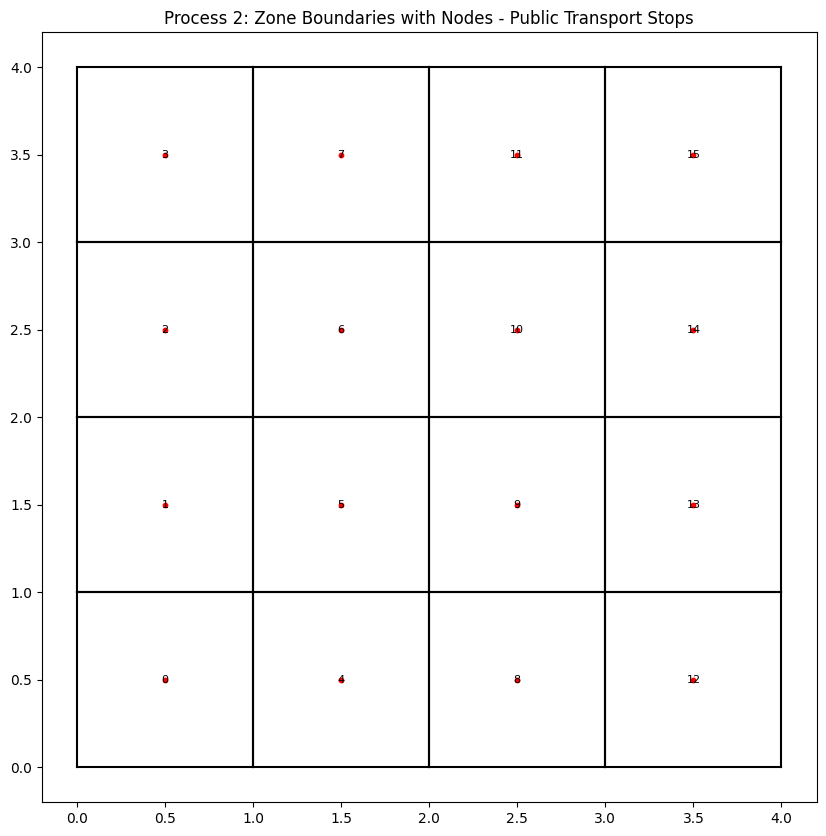

---------------------------
Statistics for model 'NetworkDesign':
  Problem type                : MIP
  Linear constraint matrix    : 1593 rows, 2266 columns, 7596 nonzeros
  Variable types              : 0 continuous, 2266 integer (393 binary)
  Matrix range                : [1e+00, 1e+03]
  Objective range             : [8e-01, 9e-01]
  Bounds range                : [1e+00, 3e+01]
  RHS range                   : [1e+00, 2e+04]
---------------------------
✅ Gurobi 结果已保存到 gurobi_results_8*8_20250513_174427.json

✅ 选定的站点（y=1）及其初始库存 v 和容量 z：
🚲 站点 Node(BS-0, coordinate=(0.5, 0.5), is_origin=False, : y = 1.0, v(initial inventory) = 12.0, z(capacity) = 12.0
🚲 站点 Node(BS-1, coordinate=(0.5, 1.5), is_origin=False, : y = 1.0, v(initial inventory) = 14.0, z(capacity) = 14.0
🚲 站点 Node(BS-2, coordinate=(0.5, 2.5), is_origin=False, : y = 1.0, v(initial inventory) = 14.0, z(capacity) = 14.0
🚲 站点 Node(BS-5, coordinate=(1.5, 1.5), is_origin=False, : y = 1.0, v(initial inventory) = 9.0, z(capacity) = 

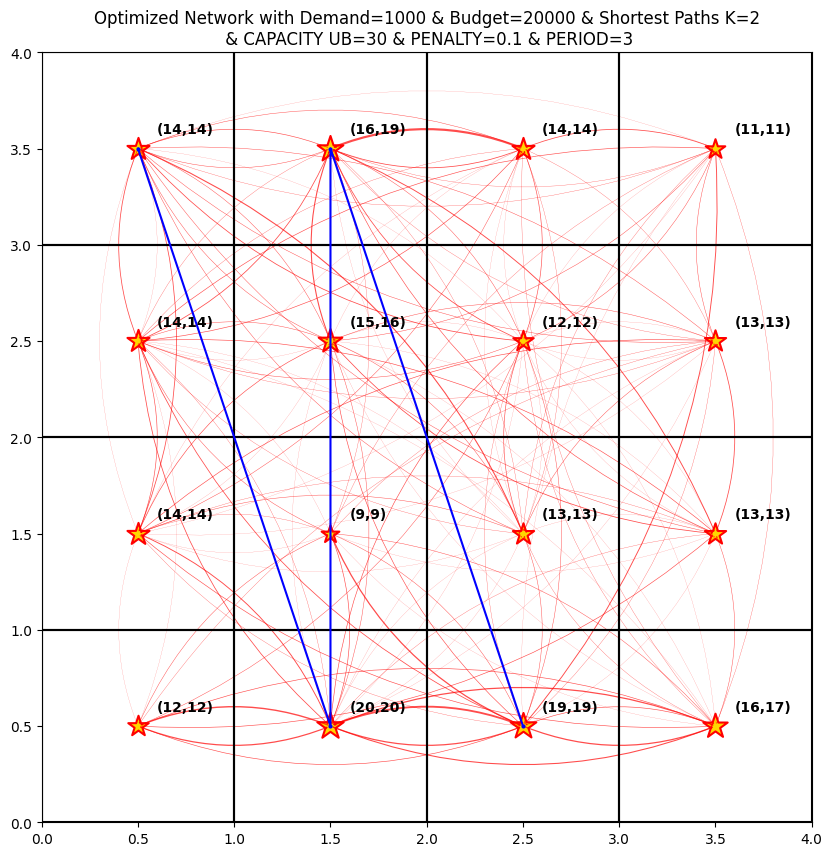

In [1]:
from shared_mobility_network_optimizer import SharedMobilityNetworkOptimizer
from shared_mobility_network_optimizer.models import NetworkDesignBSSConfig

config = NetworkDesignBSSConfig(
    AREA_LENGTH=4,
    AREA_WIDTH=4,
    NUM_SHORTEST_PATHS=2,
    TOTAL_TRIPS_NUMBER=50,
    FIXED_LINE_POINTS_LST = [[3, 4, 7, 8]]

)
model = SharedMobilityNetworkOptimizer(config=config)

model.build_network()
model.optimize()
model.plot()
model.to_geojson()